In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import svm

C:\Users\Administrator\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
class_1 = 500
class_2 = 50#两个类别数目
centers = [[0.0, 0.0], [2.0, 2.0]]#设定两个类别中心
cluster_std = [1.5, .5] #两个类别方差
x, y = make_blobs(n_samples=[class_1, class_2], centers=centers
                 , cluster_std=cluster_std
                 , random_state=0, shuffle=False)

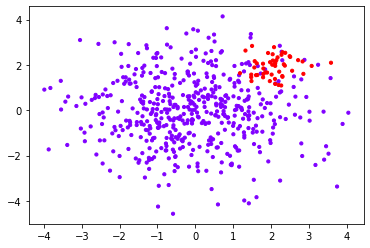

In [3]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='rainbow', s=10)

In [6]:
clf_no = svm.SVC(kernel='linear', C=1.0)
clf_no.fit(x, y)
clf_no.score(x, y)

0.9418181818181818

In [8]:
clf = svm.SVC(kernel='linear', C=1.0, class_weight={1:10})
clf.fit(x, y)
clf.score(x, y)#score代表准确性

0.9127272727272727

In [12]:
#相当于get_lim到生成meshgrid
xx, yy = np.mgrid[x[:,0].min():x[:,0].max():30j, x[:,1].min():x[:,1].max():30j]

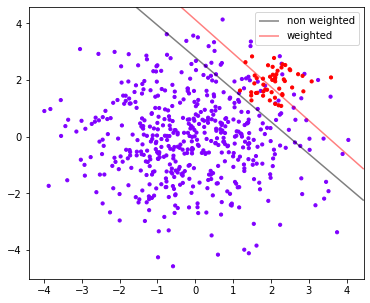

In [19]:
plt.figure(figsize=(6, 5))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap="rainbow", s=10)
ax = plt.gca() #获取当前图的子图
#画决策边界，首先画出网格
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()

xx = np.linspace(x_lim[0], x_lim[1], 30)
yy = np.linspace(y_lim[0], y_lim[1], 30)

xx, yy = np.meshgrid(xx, yy)
xy = np.vstack([xx.ravel(), yy.ravel()]).T

#找出样本点到决策边界距离
z_clf = clf.decision_function(xy).reshape(xx.shape)
a = ax.contour(xx, yy, z_clf, colors='black', levels=[0], alpha=.5, linestyles='-')
z_clfno = clf_no.decision_function(xy).reshape(xx.shape)
b = ax.contour(xx, yy, z_clfno, colors='red', levels=[0], alpha=.5, linestyles='-')

#画出图例
plt.legend([a.collections[0], b.collections[0]], ['non weighted', 'weighted']
          , loc='upper right')
plt.show()

In [18]:
[*a.collections]

## 精确度

In [21]:
(y[y == clf.predict(x)] ==1).sum() / (clf.predict(x) == 1).sum()

0.5102040816326531

In [22]:
(y[y == clf_no.predict(x)] == 1).sum() / (clf_no.predict(x) == 1).sum()

0.7142857142857143

## 召回率 

In [23]:
(y[y == clf.predict(x)] == 1).sum() / (y == 1).sum()

1.0

In [25]:
(y[y == clf_no.predict(x)] == 1).sum() / (y == 1).sum()

0.6

In [26]:
from sklearn import metrics

In [27]:
metrics.confusion_matrix(y, clf.predict(x))

array([[452,  48],
       [  0,  50]], dtype=int64)

# 使用SVC预测概率

In [32]:
clf_pro = svm.SVC(kernel='linear', C=1.0, probability=True).fit(x, y)
prob = clf_pro.predict_proba(x)

In [30]:
clf_pro.decision_function(x)#生成到分界线的距离

array([ -0.39182241,   0.95617053,  -2.24996184,  -2.63659269,
        -3.65243197,  -1.67311996,  -2.56396417,  -2.80650393,
        -1.76184723,  -4.7948575 ,  -7.59061196,  -3.66174848,
        -2.2508023 ,  -4.27626526,   0.78571364,  -3.24751892,
        -8.57016271,  -4.45823747,  -0.14034183,  -5.20657114,
        -8.02181046,  -4.18420871,  -5.6222409 ,  -5.12602771,
        -7.22592707,  -5.07749638,  -6.72386021,  -3.4945225 ,
        -3.51475144,  -5.72941551,  -5.79160724,  -8.06232013,
        -4.36303857,  -6.25419679,  -5.59426696,  -2.60919281,
        -3.90887478,  -4.38754704,  -6.46432224,  -4.54279979,
        -4.78961735,  -5.53727469,   1.33920817,  -2.27766451,
        -4.39650854,  -2.97649872,  -2.26771979,  -2.40781748,
        -1.41638181,  -3.26142275,  -2.7712218 ,  -4.87288439,
        -3.2594128 ,  -5.91189118,   1.48676267,   0.5389064 ,
        -2.76188843,  -3.36126945,  -2.64697843,  -1.63635284,
        -5.04695135,  -1.59196902,  -5.5195418 ,  -2.10

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score

In [34]:
#从混淆矩阵中获取FPR和Recall


## 使用sklearn画出ROC曲线 

In [36]:
from sklearn.metrics import roc_auc_score#roc曲线
from sklearn.metrics import roc_curve

In [37]:
FPR, recall, thresholds = roc_curve(y, clf_pro.decision_function(x), pos_label=1)

In [41]:
FPR.shape

(45,)

In [40]:
recall.shape

(45,)

In [42]:
thresholds

array([  3.18236076,   2.18236076,   1.48676267,   1.35964325,
         1.33920817,   1.14038015,   1.13383091,   1.00003406,
         0.85085628,   0.84476439,   0.78571364,   0.60568093,
         0.5389064 ,   0.46718521,   0.44396046,   0.03907036,
        -0.07011269,  -0.10668727,  -0.1258212 ,  -0.13845693,
        -0.14034183,  -0.16790648,  -0.2040958 ,  -0.22137683,
        -0.24381463,  -0.26762451,  -0.34446784,  -0.3467975 ,
        -0.39182241,  -0.40676459,  -0.4589064 ,  -0.46310299,
        -0.49195707,  -0.5088941 ,  -0.53560561,  -0.55152081,
        -0.62628865,  -0.67580418,  -0.78127198,  -0.79874442,
        -0.88438995,  -0.91257798,  -1.01417607,  -1.08601917,
       -10.31959605])

In [43]:
#计算AUC面积
roc_auc_score(y, clf_pro.decision_function(x))

0.9696400000000001

In [44]:
#利用FPR - recall最大值便可以找到最大的阈值